In [3]:
# Bibliotheken und Packages
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, cohen_kappa_score, matthews_corrcoef
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# um Normalverteilung zu testen
from scipy.stats import shapiro
# stat. Tests
from scipy.stats import wilcoxon
from scipy.stats import chi2_contingency

# Stichprobe des gesamten Datensatzes

In [122]:
df_stich = pd.read_excel('Label_Manuell_final.xlsx')
# Zeilen entfernen, bei denen turn leer/NaN ist
df_stich = df_stich[df_stich['turn'].notna() & df_stich['turn'].str.strip().ne('')]
df_stich = df_stich.copy()

In [123]:
df_stich['label_1'] = df_stich['label_1'].str.lower()
df_stich['label_0'] = df_stich['label_0'].str.lower()

df_stich_st = df_stich[df_stich['role'] == 'student']
df_stich_st = df_stich_st.copy()

### Verteilungen Label

In [124]:
label_1_counts_stich = df_stich_st['label_1'].value_counts()
label_0_counts = df_stich_st['label_0'].value_counts()
print(label_1_counts_stich)
print(label_0_counts)

label_1
preparation         138
knowledge            27
instruction          16
equipment            13
material             12
manual technique      7
miscellaneous         5
amount                5
time                  4
Name: count, dtype: int64
label_0
competence    145
fact           82
Name: count, dtype: int64


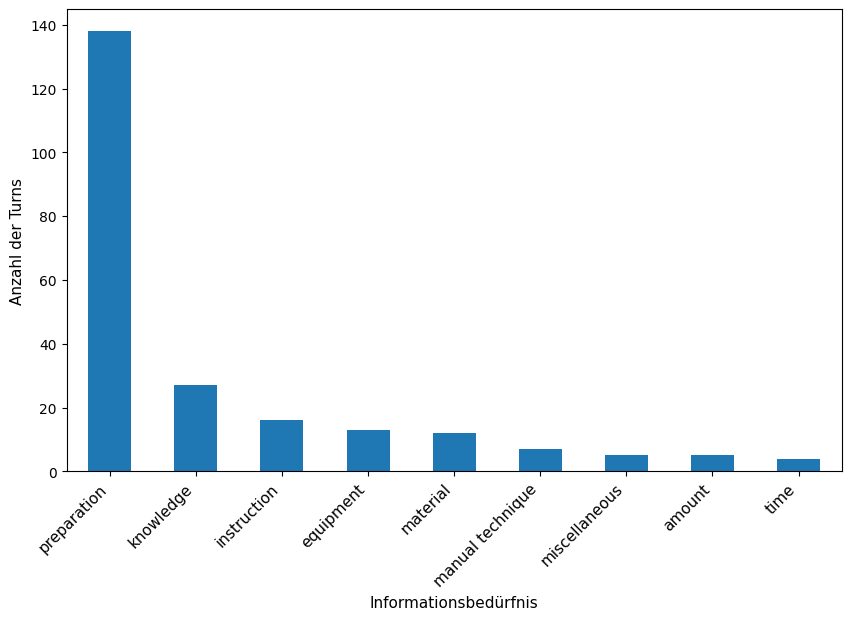

In [125]:
#  Verteilung Level 1
plt.figure(figsize=(10, 6))
label_1_counts_stich.plot(kind='bar')
#plt.title('Verteilung Informationsbedürfnisse Level 1 der Stichprobe')
plt.xlabel('Informationsbedürfnis', fontsize=11)
plt.xticks(rotation=45, ha='right', fontsize=11) # schräg, damit besser lesbar
plt.ylabel('Anzahl der Turns', fontsize=11)
plt.show()

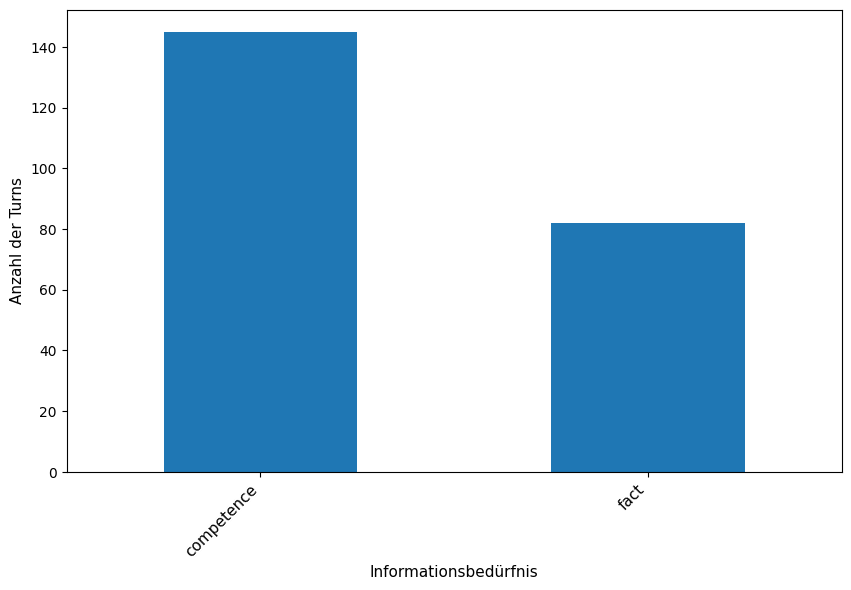

In [126]:
# Verteilung Level 0
plt.figure(figsize=(10, 6))
label_0_counts.plot(kind='bar')
#plt.title('Verteilung Informationsbedürfnisse Level 0 der Stichprobe')
plt.xlabel('Informationsbedürfnis', fontsize=11)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.ylabel('Anzahl der Turns', fontsize=11)
plt.show()

### Anzahl turns pro Label

In [127]:
# Anzahl der Turns pro Label Level 1
turn_counts_per_label = df_stich_st.groupby('label_1')['turn'].count()

# Statistische Daten (min, max, mean usw.)
turn_stats = turn_counts_per_label.describe()
print(turn_stats)

count      9.000000
mean      25.222222
std       42.912055
min        4.000000
25%        5.000000
50%       12.000000
75%       16.000000
max      138.000000
Name: turn, dtype: float64


In [128]:
# Anzahl der Turns pro Label Level 0
turn_counts_per_label = df_stich_st.groupby('label_0')['turn'].count()

# Stat. Daten
turn_stats = turn_counts_per_label.describe()
print(turn_stats)

count      2.000000
mean     113.500000
std       44.547727
min       82.000000
25%       97.750000
50%      113.500000
75%      129.250000
max      145.000000
Name: turn, dtype: float64


### Anteil der Turns pro Label in Prozent

label_1
preparation         60.79
knowledge           11.89
instruction          7.05
equipment            5.73
material             5.29
manual technique     3.08
miscellaneous        2.20
amount               2.20
time                 1.76
Name: count, dtype: float64


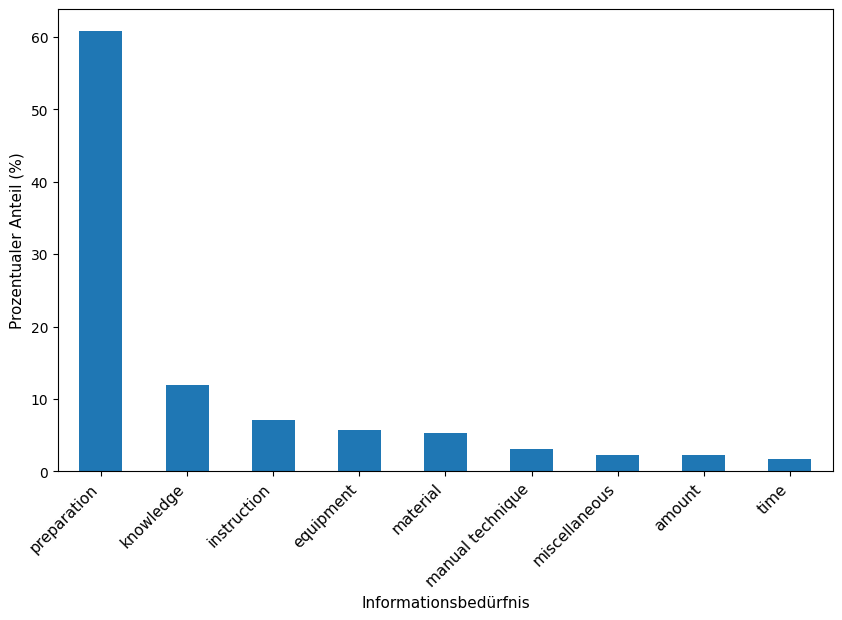

In [129]:
label_1_percentage = ((label_1_counts_stich / len(df_stich_st)) * 100).round(2)
print(label_1_percentage)

# proz. Anteil Turns pro Label Level 1
plt.figure(figsize=(10, 6))
label_1_percentage.plot(kind='bar')
plt.xlabel('Informationsbedürfnis', fontsize=11)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.ylabel('Prozentualer Anteil (%)', fontsize=11)
plt.show()

### Länge turn

In [130]:
# Turns in Liste aus Wörtern
words_per_turn = df_stich_st['turn'].str.split()

In [131]:
# Länge jeder Liste
words_per_turn = words_per_turn.str.len()

In [132]:
len_mean = words_per_turn.mean()
len_min = words_per_turn.min()
len_max = words_per_turn.max()
print("Länge der Turns in Stichprobe von student")
print(f'Durchschnitt {len_mean:.2f}')
print(f'Min {len_min}')
print(f'Max {len_max}')

Länge der Turns in Stichprobe von student
Durchschnitt 12.88
Min 3
Max 54


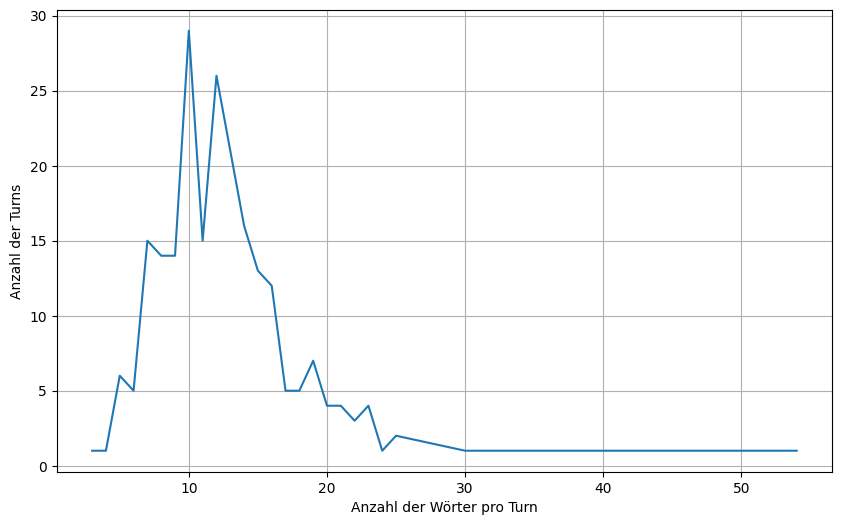

In [138]:
# Verteilung Länge der Turns
turn_length_counts = words_per_turn.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(turn_length_counts.index, turn_length_counts.values)
#plt.title('Verteilung der Längen der Turns')
plt.xlabel('Anzahl der Wörter pro Turn')
plt.ylabel('Anzahl der Turns')
plt.grid(True) # Gitter hinzufügen
plt.show()

# Test-Datensatz

In [146]:
test_df = pd.read_excel('test_df.xlsx')
# Zeilen entfernen, bei denen turn leer/NaN ist
test_df = test_df[test_df['turn'].notna() & test_df['turn'].str.strip().ne('')]
test_df = test_df.copy()

In [147]:
test_df_st = test_df[test_df['role'] == 'student']
test_df_st = test_df_st.copy()

### Länge turns Durchschnitt

In [148]:
turn_counts_per_label = test_df_st.groupby('label_1')['turn'].count()

# Statistische Daten (min, max, mean usw.)
turn_stats = turn_counts_per_label.describe()
print(turn_stats)

count     9.000000
mean     13.666667
std      21.365861
min       3.000000
25%       4.000000
50%       7.000000
75%      10.000000
max      70.000000
Name: turn, dtype: float64


## Zero Shot Level 0

In [149]:
# gpt4 zero level 0
zero_level_0 = pd.read_excel('GPT4_Zero_Level0.xlsx')

In [150]:
true_labels_level_0 = zero_level_0['label_0']
pred_labels_zero_level_0 = zero_level_0['pred_label_zero_level_0']
labels_level_0 = zero_level_0['pred_label_zero_level_0'].unique()

In [151]:
# Berechnung Precision, Recall und F1-Score für jedes Label
precision_zero_level_0 = precision_score(true_labels_level_0, pred_labels_zero_level_0, average=None, labels=labels_level_0)
recall_zero_level_0 = recall_score(true_labels_level_0, pred_labels_zero_level_0, average=None, labels=labels_level_0)
f1_zero_level_0 = f1_score(true_labels_level_0, pred_labels_zero_level_0, average=None, labels=labels_level_0)

In [152]:
report = classification_report(true_labels_level_0, pred_labels_zero_level_0, labels=labels_level_0)
print(report)
# macro berücksichtigt die Verteilung der Klassen nicht
#weighted berückschtigt die Verteilung, also dass zB die Label mit mehr Bsp eine höhere Chance auf richtig haben als zB amount

              precision    recall  f1-score   support

        fact       0.98      0.94      0.96        48
  competence       0.96      0.99      0.97        75

    accuracy                           0.97       123
   macro avg       0.97      0.96      0.97       123
weighted avg       0.97      0.97      0.97       123



## Zero Shot Level 1

In [153]:
# gpt4 zero level 1
zero_level_1 = pd.read_excel('GPT4_Zero_Level1.xlsx')

In [154]:
true_labels_level_1 = zero_level_1['label_1']
pred_labels_zero_level_1 = zero_level_1['pred_label_zero_level_1']
labels_level_1 = zero_level_1['pred_label_zero_level_1'].unique()

In [155]:
# Verteilungen Label
label_1_frequ = true_labels_level_1.value_counts()
label_1_pred_frequ = pred_labels_zero_level_1.value_counts()

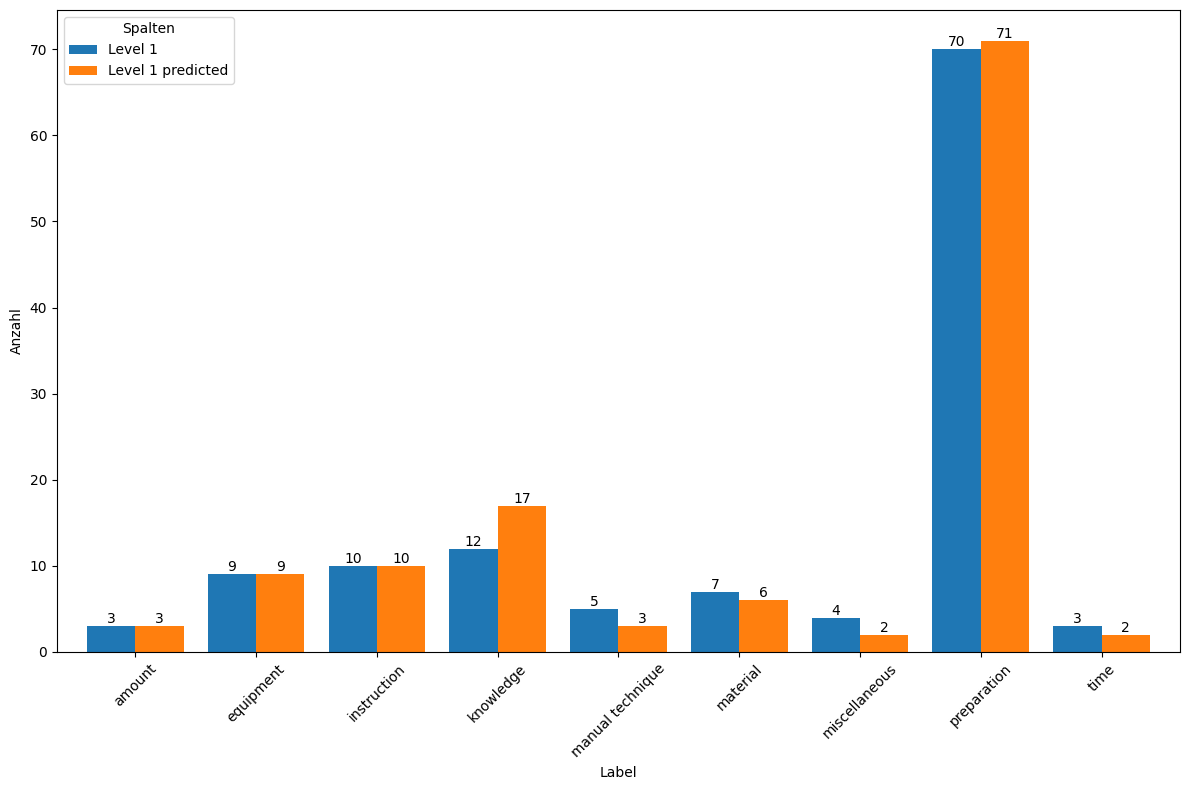

In [156]:
df_counts = pd.DataFrame({
    'Level 1': label_1_frequ,
    'Level 1 predicted': label_1_pred_frequ
}).fillna(0)

bars = df_counts.plot(kind='bar', figsize=(12, 8), width=0.8)
#plt.title('Verteilung Label manuell und predicted')
plt.xlabel('Label')
plt.ylabel('Anzahl')

for c in bars.containers:
  bars.bar_label(c, label_type='edge')

plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Spalten')
plt.show()

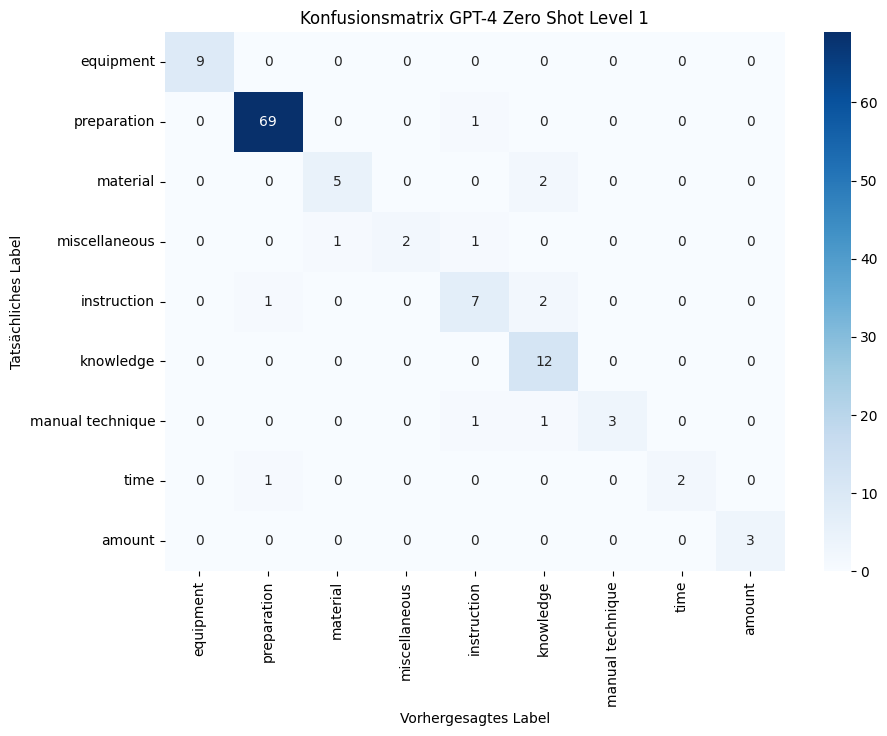

In [157]:
# Reihenfolge Label
new_order = ['equipment', 'preparation', 'material', 'miscellaneous', 'instruction', 'knowledge', 'manual technique', 'time', 'amount']

#Confusionmatrix
confusionmatrix_zero_level_1 = confusion_matrix(true_labels_level_1, pred_labels_zero_level_1, labels=new_order)
plt.figure(figsize=(10, 7))
sns.heatmap(confusionmatrix_zero_level_1, annot=True, fmt='d', cmap='Blues', xticklabels=new_order, yticklabels=new_order)
plt.title('Konfusionsmatrix GPT-4 Zero Shot Level 1')
plt.ylabel('Tatsächliches Label')
plt.xlabel('Vorhergesagtes Label')
plt.show()

In [158]:
# Berechnung Precision, Recall und F1-Score für jedes Label
precision_zero_level_1 = precision_score(true_labels_level_1, pred_labels_zero_level_1, average=None, labels=labels_level_1)
recall_zero_level_1 = recall_score(true_labels_level_1, pred_labels_zero_level_1, average=None, labels=labels_level_1)
f1_zero_level_1 = f1_score(true_labels_level_1, pred_labels_zero_level_1, average=None, labels=labels_level_1)

In [159]:
report = classification_report(true_labels_level_1, pred_labels_zero_level_1, labels=labels_level_1)
print(report)
# macro berücksichtigt die Verteilung der Klassen nicht
#weighted berückschtigt die Verteilung, also dass zB die Label mit mehr Bsp eine höhere Chance auf richtig haben als zB amount

                  precision    recall  f1-score   support

       equipment       1.00      1.00      1.00         9
     preparation       0.97      0.99      0.98        70
     instruction       0.70      0.70      0.70        10
        material       0.83      0.71      0.77         7
   miscellaneous       1.00      0.50      0.67         4
       knowledge       0.71      1.00      0.83        12
            time       1.00      0.67      0.80         3
manual technique       1.00      0.60      0.75         5
          amount       1.00      1.00      1.00         3

        accuracy                           0.91       123
       macro avg       0.91      0.80      0.83       123
    weighted avg       0.92      0.91      0.91       123



## Few Shot Level 0

In [160]:
# gpt4 zero level 1
few_level_0 = pd.read_excel('GPT4_Few_Level0.xlsx')

In [161]:
true_labels_level_0 = few_level_0['label_0']
pred_labels_few_level_0 = few_level_0['pred_label_few_level_0']
labels_level_0 = few_level_0['pred_label_few_level_0'].unique()

In [162]:
# Berechnung Precision, Recall und F1-Score für jedes Label
precision_few_level_0 = precision_score(true_labels_level_0, pred_labels_few_level_0, average=None, labels=labels_level_0)
recall_few_level_0 = recall_score(true_labels_level_0, pred_labels_few_level_0, average=None, labels=labels_level_0)
f1_few_level_0 = f1_score(true_labels_level_0, pred_labels_few_level_0, average=None, labels=labels_level_0)

In [163]:
report = classification_report(true_labels_level_0, pred_labels_few_level_0, labels=labels_level_0)
print(report)
# macro berücksichtigt die Verteilung der Klassen nicht
#weighted berückschtigt die Verteilung, also dass zB die Label mit mehr Bsp eine höhere Chance auf richtig haben als zB amount

              precision    recall  f1-score   support

        fact       0.98      0.96      0.97        48
  competence       0.97      0.99      0.98        75

    accuracy                           0.98       123
   macro avg       0.98      0.97      0.97       123
weighted avg       0.98      0.98      0.98       123



## Few Shot Level 1

In [164]:
# gpt4 few level 1
few_level_1 = pd.read_excel('GPT4_Few_Level1.xlsx')

In [165]:
true_labels_level_1 = few_level_1['label_1']
pred_labels_few_level_1 = few_level_1['pred_label_few_level_1']
labels_level_1 = few_level_1['pred_label_few_level_1'].unique()

In [166]:
# Verteilungen Label
label_1_frequ_few = true_labels_level_1.value_counts()
label_1_pred_frequ_few = pred_labels_few_level_1.value_counts()

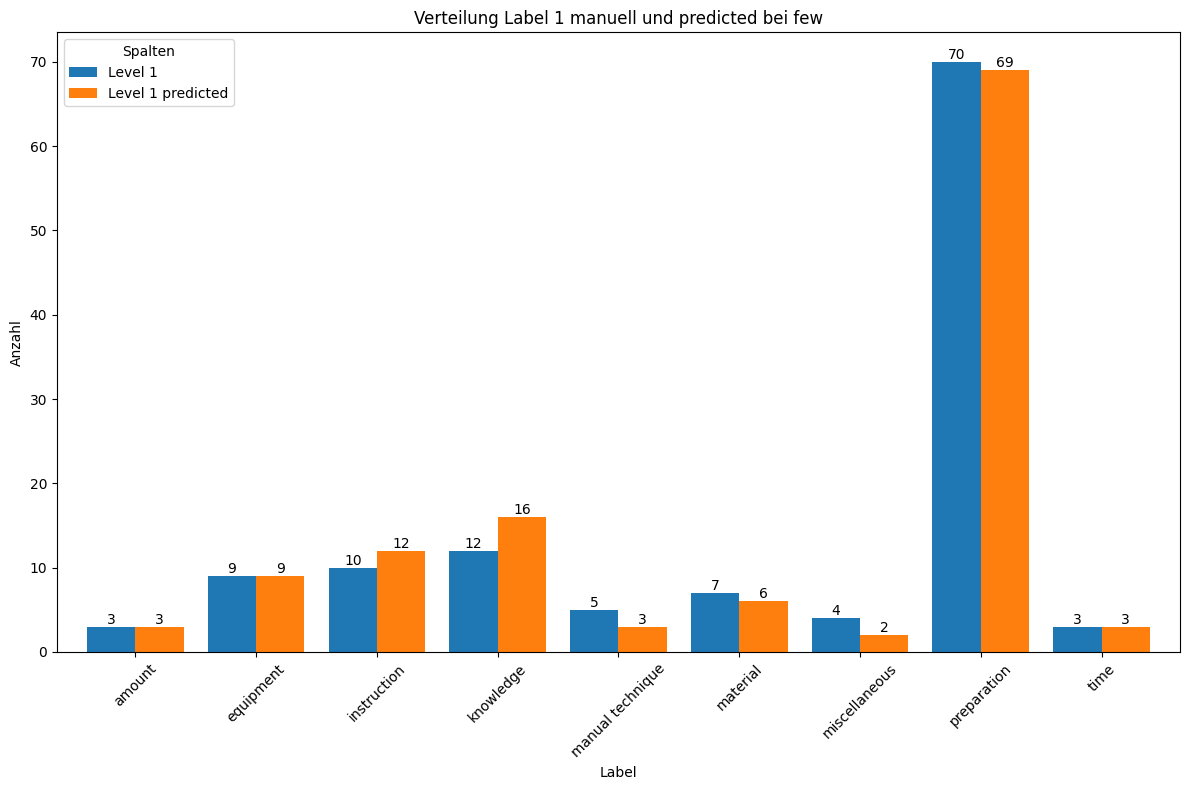

In [167]:
df_counts = pd.DataFrame({
    'Level 1': label_1_frequ_few,
    'Level 1 predicted': label_1_pred_frequ_few
}).fillna(0)

bars = df_counts.plot(kind='bar', figsize=(12, 8), width=0.8)
plt.title('Verteilung Label 1 manuell und predicted bei few')
plt.xlabel('Label')
plt.ylabel('Anzahl')

for c in bars.containers:
  bars.bar_label(c, label_type='edge')

plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Spalten')
plt.show()

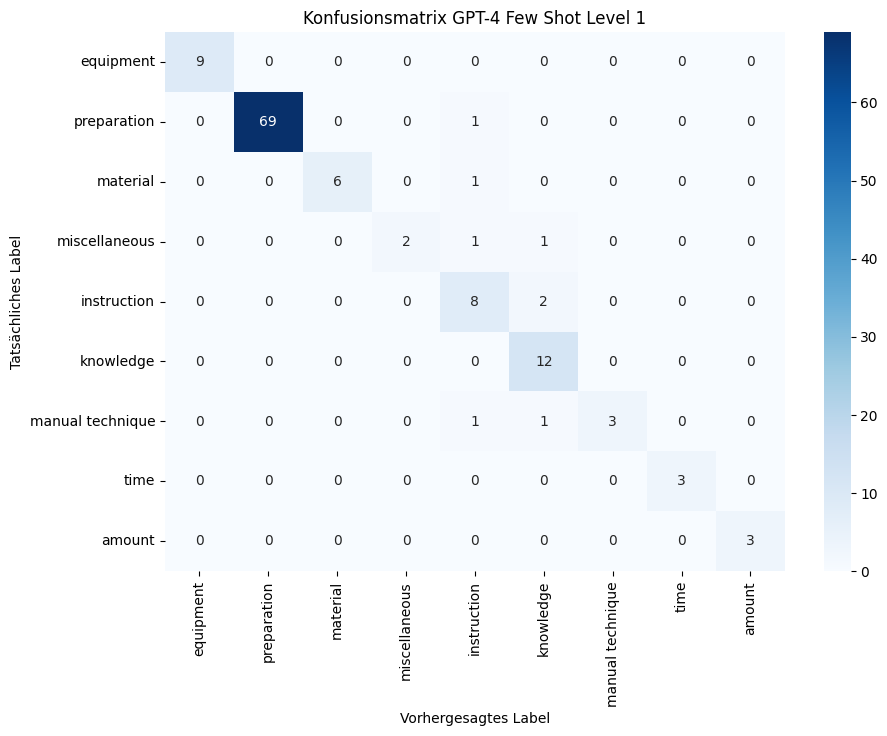

In [168]:
new_order = ['equipment', 'preparation', 'material', 'miscellaneous', 'instruction', 'knowledge', 'manual technique', 'time', 'amount']

confusionmatrix_few_level_1 = confusion_matrix(true_labels_level_1, pred_labels_few_level_1, labels=new_order)

plt.figure(figsize=(10, 7))
sns.heatmap(confusionmatrix_few_level_1, annot=True, fmt='d', cmap='Blues', xticklabels=new_order, yticklabels=new_order)
plt.title('Konfusionsmatrix GPT-4 Few Shot Level 1')
plt.ylabel('Tatsächliches Label')
plt.xlabel('Vorhergesagtes Label')
plt.show()

In [169]:
true_labels_level_1 = few_level_1['label_1']
pred_labels_few_level_1 = few_level_1['pred_label_few_level_1']
labels_level_1 = few_level_1['pred_label_few_level_1'].unique()

In [170]:
# Berechnung Precision, Recall und F1-Score für jedes Label
precision_few_level_1 = precision_score(true_labels_level_1, pred_labels_few_level_1, average=None, labels=labels_level_1)
recall_few_level_1 = recall_score(true_labels_level_1, pred_labels_few_level_1, average=None, labels=labels_level_1)
f1_few_level_1 = f1_score(true_labels_level_1, pred_labels_few_level_1, average=None, labels=labels_level_1)

In [171]:
report = classification_report(true_labels_level_1, pred_labels_few_level_1, labels=labels_level_1)
print(report)
# macro berücksichtigt die Verteilung der Klassen nicht
#weighted berückschtigt die Verteilung, also dass zB die Label mit mehr Bsp eine höhere Chance auf richtig haben als zB amount

                  precision    recall  f1-score   support

       equipment       1.00      1.00      1.00         9
     preparation       1.00      0.99      0.99        70
     instruction       0.67      0.80      0.73        10
        material       1.00      0.86      0.92         7
   miscellaneous       1.00      0.50      0.67         4
       knowledge       0.75      1.00      0.86        12
            time       1.00      1.00      1.00         3
manual technique       1.00      0.60      0.75         5
          amount       1.00      1.00      1.00         3

        accuracy                           0.93       123
       macro avg       0.94      0.86      0.88       123
    weighted avg       0.95      0.93      0.93       123



## Stat. Test Test-Datensatz

In [ ]:
#precision_zero_level_1
#recall_zero_level_1
#f1_zero_level_1

#precision_few_level_1
#recall_few_level_1
#f1_few_level_1

### Prüfung auf Normalverteilung oder nicht

In [62]:
# Berechnung Diffs für Precision, Recall und F1-Score
precision_diff = [few - zero for few, zero in zip(precision_few_level_1, precision_zero_level_1)]
recall_diff = [few - zero for few, zero in zip(recall_few_level_1, recall_zero_level_1)]
f1_diff = [few - zero for few, zero in zip(f1_few_level_1, f1_zero_level_1)]

print("Differenzen P", precision_diff)
print("Differenzen R", recall_diff)
print("Differenzen F1-Score", f1_diff)

Differenzen P [0.0, 0.028169014084507005, -0.033333333333333326, 0.16666666666666663, 0.0, 0.044117647058823484, 0.0, 0.0, 0.0]
Differenzen R [0.0, 0.0, 0.10000000000000009, 0.1428571428571428, 0.0, 0.0, 0.33333333333333337, 0.0, 0.0]
Differenzen F1-Score [0.0, 0.014082351140364269, 0.027272727272727226, 0.15384615384615385, 0.0, 0.029556650246305383, 0.19999999999999996, 0.0, 0.0]


In [67]:
# Normalverteilung P
stat_precision, p_val_precision = shapiro(precision_diff)
print(f"Shapiro precision p-Wert = {p_val_precision}")

# Normalverteilung R
stat_recall, p_val_recall = shapiro(recall_diff)
print(f"Shapiro recall p-Wert = {p_val_recall}")

# Normalverteilung F1
stat_f1, p_val_f1 = shapiro(f1_diff)
print(f"Shapiro f1 p-Wert = {p_val_f1}")

Shapiro precision p-Wert = 0.0015494904598447614
Shapiro recall p-Wert = 0.0004565106527688846
Shapiro f1 p-Wert = 0.0008814570858575058


### Wilcoxon Test

Prüfen ob normalverteilt oder nicht -> shapiro

In [68]:
# Wilcoxon Test für Unterschiede zwischen Zero und Few bei P,R und F1
# Wilcoxon Test für Precision Unterschiede
stat_precision, p_val_precision = wilcoxon(precision_few_level_1, precision_zero_level_1)
print(f"Wilcoxon precision p-Wert = {p_val_precision}")

# Wilcoxon Test für Recall Unterschiede
stat_recall, p_val_recall = wilcoxon(recall_few_level_1, recall_zero_level_1)
print(f"Wilcoxon recall p-Wert = {p_val_recall}")

# Wilcoxon Test für F1-Score Unterschiede
stat_f1, p_val_f1 = wilcoxon(f1_few_level_1, f1_zero_level_1)
print(f"Wilcoxon f1 p-Wert = {p_val_f1}")

Wilcoxon precision p-Wert = 0.27332167829229814
Wilcoxon recall p-Wert = 0.10880943004054568
Wilcoxon f1 p-Wert = 0.043114446783075355


/usr/local/lib/python3.10/dist-packages/scipy/stats/_wilcoxon.py:199: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)


# Datensatz gesamt Wizard-of-Tasks

In [ ]:
file_path = 'Wizard_of_Tasks.xlsx'
df_all_wot = pd.read_excel(file_path)

In [ ]:
# Zeilen entfernen, bei denen turn leer ist, da sonst Fehler entstehen können
df_all_wot = df_all_wot[df_all_wot['turn'].notna() & df_all_wot['turn'].str.strip().ne('')]

In [ ]:
count_turn_per_role = df_all_wot['role'].value_counts()
print(count_turn_per_role)

role
teacher    4928
student    4887
Name: count, dtype: int64


## Nach der Annotation

In [95]:
df_wot_annot = pd.read_excel('Wizard_of_Tasks_level_1.xlsx')

In [96]:
counts_per_label = df_wot_annot['pred_labels_level_1'].value_counts()
print(counts_per_label)

pred_labels_level_1
preparation         2593
knowledge            766
manual technique     369
instruction          265
equipment            237
material             224
amount               193
time                 141
miscellaneous         99
Name: count, dtype: int64


In [97]:
# Anzahl Turns pro Label
turn_counts_per_label = df_wot_annot.groupby('pred_labels_level_1')['turn'].count()

# Stat. Daten
turn_stats = turn_counts_per_label.describe()
print(turn_stats)

count       9.000000
mean      543.000000
std       793.443917
min        99.000000
25%       193.000000
50%       237.000000
75%       369.000000
max      2593.000000
Name: turn, dtype: float64


## Verteilungen Labels

In [98]:
# Level 1 zu Level 0 zuordnen
label_mapping = {
    'preparation': 'Competence',
    'manual technique': 'Competence',
    'knowledge': 'Fact',
    'instruction': 'Fact',
    'equipment': 'Fact',
    'material': 'Fact',
    'amount': 'Fact',
    'time': 'Fact',
    'miscellaneous': 'Fact'
}

# label_0 hinzufügen
df_wot_annot['label_0'] = df_wot_annot['pred_labels_level_1'].map(label_mapping)

# Anzahl Turns pro Label pro Level 0
counts_per_label_0 = df_wot_annot.groupby('label_0')['pred_labels_level_1'].value_counts()
print(counts_per_label_0)

label_0     pred_labels_level_1
Competence  preparation            2593
            manual technique        369
Fact        knowledge               766
            instruction             265
            equipment               237
            material                224
            amount                  193
            time                    141
            miscellaneous            99
Name: count, dtype: int64


In [99]:
# Anzahl Turns pro Level 0
counts_per_label_0 = df_wot_annot['label_0'].value_counts()
print(counts_per_label_0)

label_0
Competence    2962
Fact          1925
Name: count, dtype: int64


### Länge Turns

In [100]:
words_per_turn = df_wot_annot['turn'].str.split()
# Länge jeder Liste
words_per_turn = words_per_turn.str.len()

len_mean = words_per_turn.mean()
len_min = words_per_turn.min()
len_max = words_per_turn.max()

print(f'Durchschnitt {len_mean:.2f}')
print(f'Min {len_min}')
print(f'Max {len_max}')

Durchschnitt 13.58
Min 3
Max 56


## Visuali + Prozent


In [101]:
label_counts_level_1 = df_wot_annot['pred_labels_level_1'].value_counts()

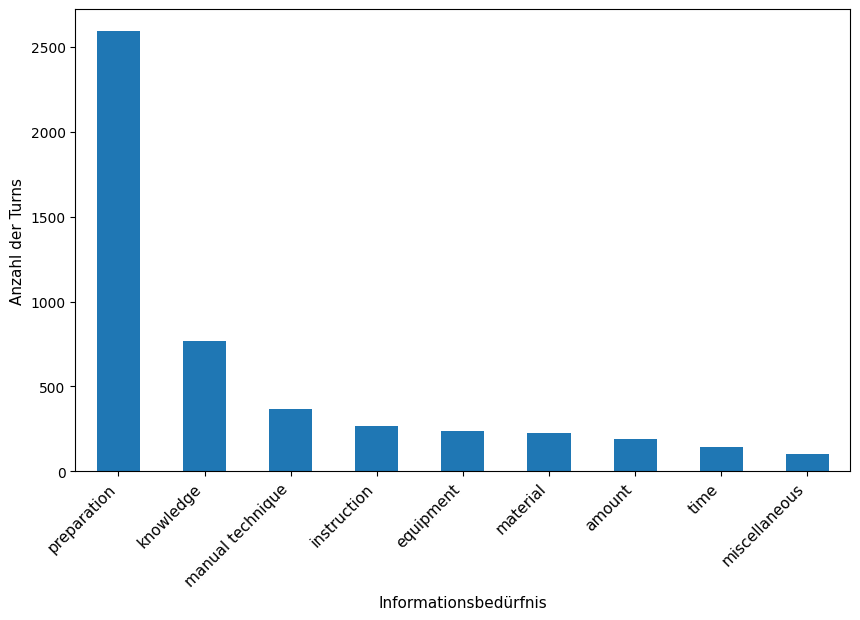

In [102]:
#  Verteilung Level 1
plt.figure(figsize=(10, 6))
label_counts_level_1.plot(kind='bar')
#plt.title('Verteilung der Label Level 1 Stichprobe')
plt.xlabel('Informationsbedürfnis', fontsize=11)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.ylabel('Anzahl der Turns', fontsize=11)
plt.show()

pred_labels_level_1
preparation         53.06
knowledge           15.67
manual technique     7.55
instruction          5.42
equipment            4.85
material             4.58
amount               3.95
time                 2.89
miscellaneous        2.03
Name: count, dtype: float64


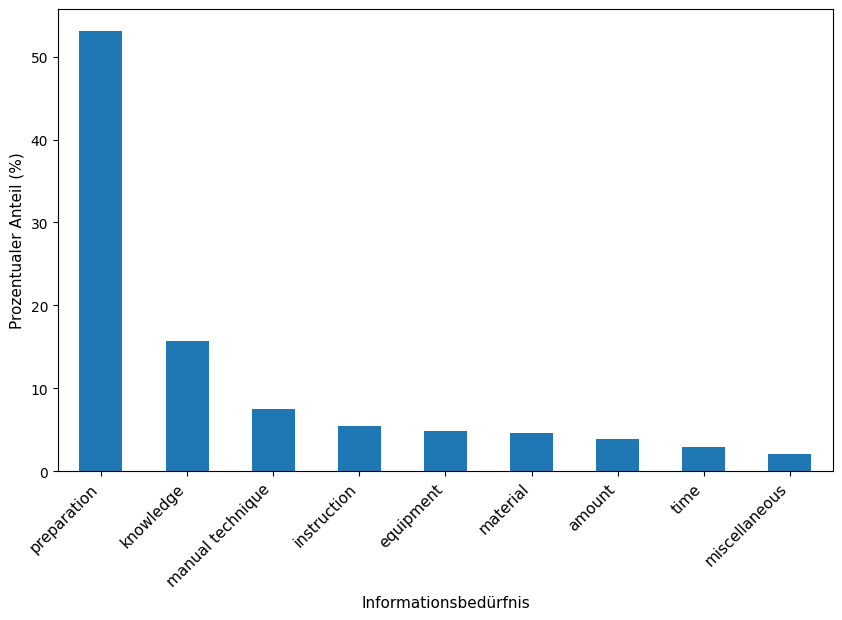

In [103]:
label_1_percentage_complete = ((label_counts_level_1 / len(df_wot_annot)) * 100).round(2)
print(label_1_percentage_complete)

# proz. Anteil Turns pro Label Level 1
plt.figure(figsize=(10, 6))
label_1_percentage_complete.plot(kind='bar')
plt.xlabel('Informationsbedürfnis', fontsize=11)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.ylabel('Prozentualer Anteil (%)', fontsize=11)
plt.show()

# Vergleich Stichprobe und gesamter annotierter Datensatz

label_1
preparation         60.79
knowledge           11.89
instruction          7.05
equipment            5.73
material             5.29
manual technique     3.08
miscellaneous        2.20
amount               2.20
time                 1.76
Name: count, dtype: float64
label_1
preparation         53.06
knowledge           15.67
instruction          5.42
equipment            4.85
material             4.58
manual technique     7.55
miscellaneous        2.03
amount               3.95
time                 2.89
Name: count, dtype: float64


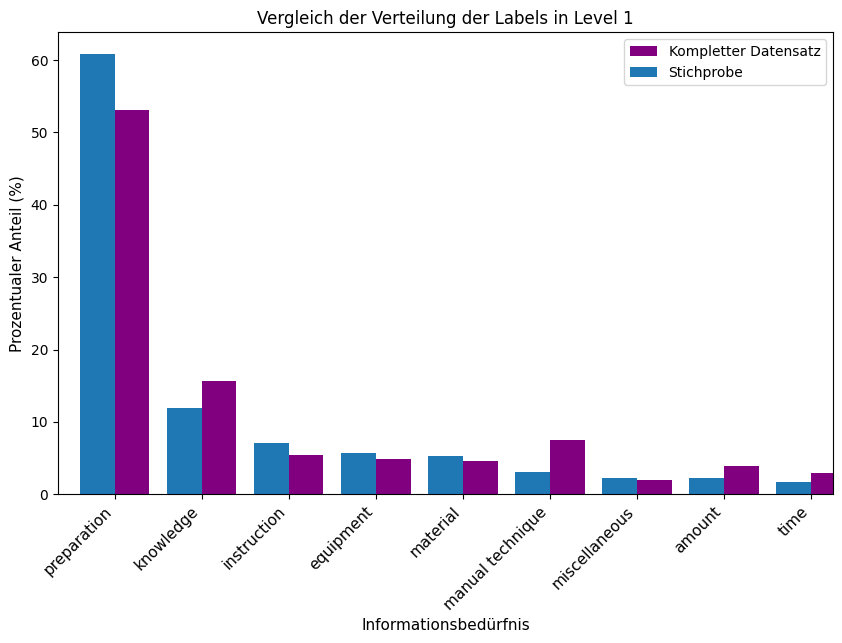

In [105]:
label_1_percentage.index = label_1_percentage.index.str.lower()
label_1_percentage_complete.index = label_1_percentage_complete.index.str.lower()

# Label sortieren
sorted_labels = label_1_percentage.sort_values(ascending=False).index

# reindexieren, damit beide gleiche Reihenfolge Labels
label_1_percentage_sorted = label_1_percentage.reindex(sorted_labels)
label_1_percentage_complete_sorted = label_1_percentage_complete.reindex(sorted_labels)
print(label_1_percentage_sorted)
print(label_1_percentage_complete_sorted)

plt.figure(figsize=(10, 6))

label_1_percentage_complete_sorted.plot(kind='bar', color='purple', position=0, width=0.4, label='Kompletter Datensatz')
label_1_percentage_sorted.plot(kind='bar', position=1, width=0.4, label='Stichprobe')

plt.xlabel('Informationsbedürfnis', fontsize=11)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.ylabel('Prozentualer Anteil (%)', fontsize=11)
plt.legend()  # Legende
plt.title('Vergleich Verteilung der Labels Level 1')
plt.show()

## CHI QUADRAT

In [108]:
# counts Label in Stichprobe und Datensatz gesamt
observed = [label_1_counts_stich]
expected = [label_counts_level_1]

# Chi-Quadrat-Test
chi2, p, dof, ex = chi2_contingency([observed, expected])
print(f"Chi-Quadrat-Test p-Wert: {p}")

Chi-Quadrat-Test p-Wert: 0.44910802768295555


# Vergleich DIY und Kochen

In [4]:
# meine Datei
df_diy = pd.read_excel('Wizard_of_Tasks_level_1.xlsx')

# Datei Alex
df_cook = pd.read_excel('Taxo_Kochen.xlsx')

In [5]:
counts_per_label_diy = df_diy['pred_labels_level_1'].value_counts()
print(counts_per_label_diy)

pred_labels_level_1
preparation         2593
knowledge            766
manual technique     369
instruction          265
equipment            237
material             224
amount               193
time                 141
miscellaneous         99
Name: count, dtype: int64


In [6]:
counts_per_label_cook = df_cook['level_1'].value_counts()
print(counts_per_label_cook)

level_1
Preparation          768
Ingredient           658
Amount               476
Cooking technique    210
Recipe               205
Time                 182
Knowledge             49
Miscellaneous         44
Equipment             40
Temperature           31
Meal                  12
Name: count, dtype: int64


In [7]:
df_cook['level_1'] = df_cook['level_1'].str.lower()

In [8]:
# Zuordnung DIY-Kategorien zu Koch-Kategorien
mapping = {
    'preparation': 'preparation',
    'knowledge': 'knowledge',
    'manual technique': 'cooking technique',
    'instruction': 'recipe',
    'equipment': 'equipment',
    'material': 'ingredient',
    'amount': 'amount',
    'time': 'time',
    'miscellaneous': 'miscellaneous'
}

# Kategorien DIY zu ursprünglicher Koch-Kategorie zuordnen -> können damit besser verglichen werden
df_diy['mapped_labels'] = df_diy['pred_labels_level_1'].map(mapping)

# counts per label nach mapping
counts_per_label_diy_mapped = df_diy['mapped_labels'].value_counts()
print(counts_per_label_diy_mapped)

counts_per_label_cook = df_cook['level_1'].value_counts()
print(counts_per_label_cook)

mapped_labels
preparation          2593
knowledge             766
cooking technique     369
recipe                265
equipment             237
ingredient            224
amount                193
time                  141
miscellaneous          99
Name: count, dtype: int64
level_1
preparation          768
ingredient           658
amount               476
cooking technique    210
recipe               205
time                 182
knowledge             49
miscellaneous         44
equipment             40
temperature           31
meal                  12
Name: count, dtype: int64


In [9]:
# Proz. Verteilung Kategorien DIY
diy_percentage = counts_per_label_diy_mapped / counts_per_label_diy_mapped.sum() * 100
print(diy_percentage)

# Proz. Verteilung Kategorien Kochen
cook_percentage = counts_per_label_cook / counts_per_label_cook.sum() * 100
print(cook_percentage)

mapped_labels
preparation          53.059136
knowledge            15.674238
cooking technique     7.550645
recipe                5.422550
equipment             4.849601
ingredient            4.583589
amount                3.949253
time                  2.885206
miscellaneous         2.025783
Name: count, dtype: float64
level_1
preparation          28.710280
ingredient           24.598131
amount               17.794393
cooking technique     7.850467
recipe                7.663551
time                  6.803738
knowledge             1.831776
miscellaneous         1.644860
equipment             1.495327
temperature           1.158879
meal                  0.448598
Name: count, dtype: float64


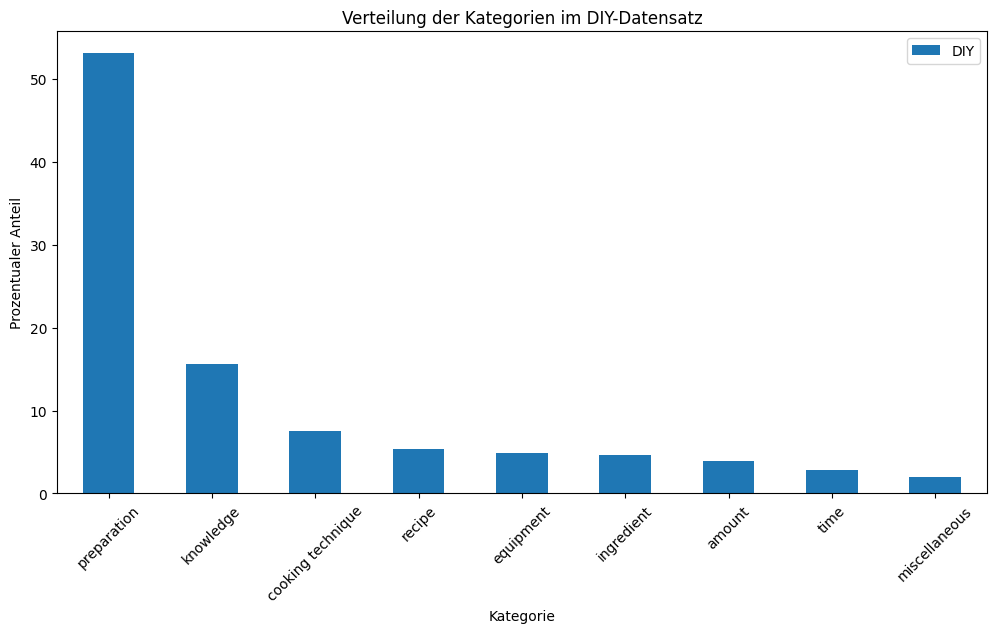

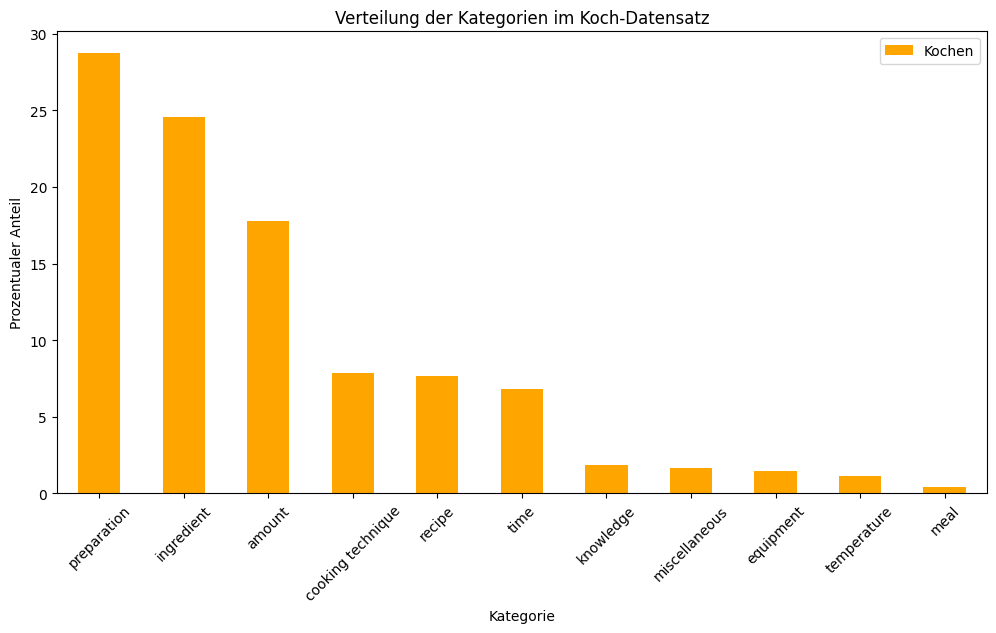

In [13]:
# DIY
plt.figure(figsize=(12, 6))
diy_percentage.plot(kind='bar', label='DIY')
plt.title('Verteilung der Kategorien im DIY-Datensatz')
plt.xlabel('Kategorie')
plt.ylabel('Prozentualer Anteil')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Kochen
plt.figure(figsize=(12, 6))
cook_percentage.plot(kind='bar', color='orange', label='Kochen')
plt.title('Verteilung der Kategorien im Koch-Datensatz')
plt.xlabel('Kategorie')
plt.ylabel('Prozentualer Anteil')
plt.xticks(rotation=45)
plt.legend()
plt.show()


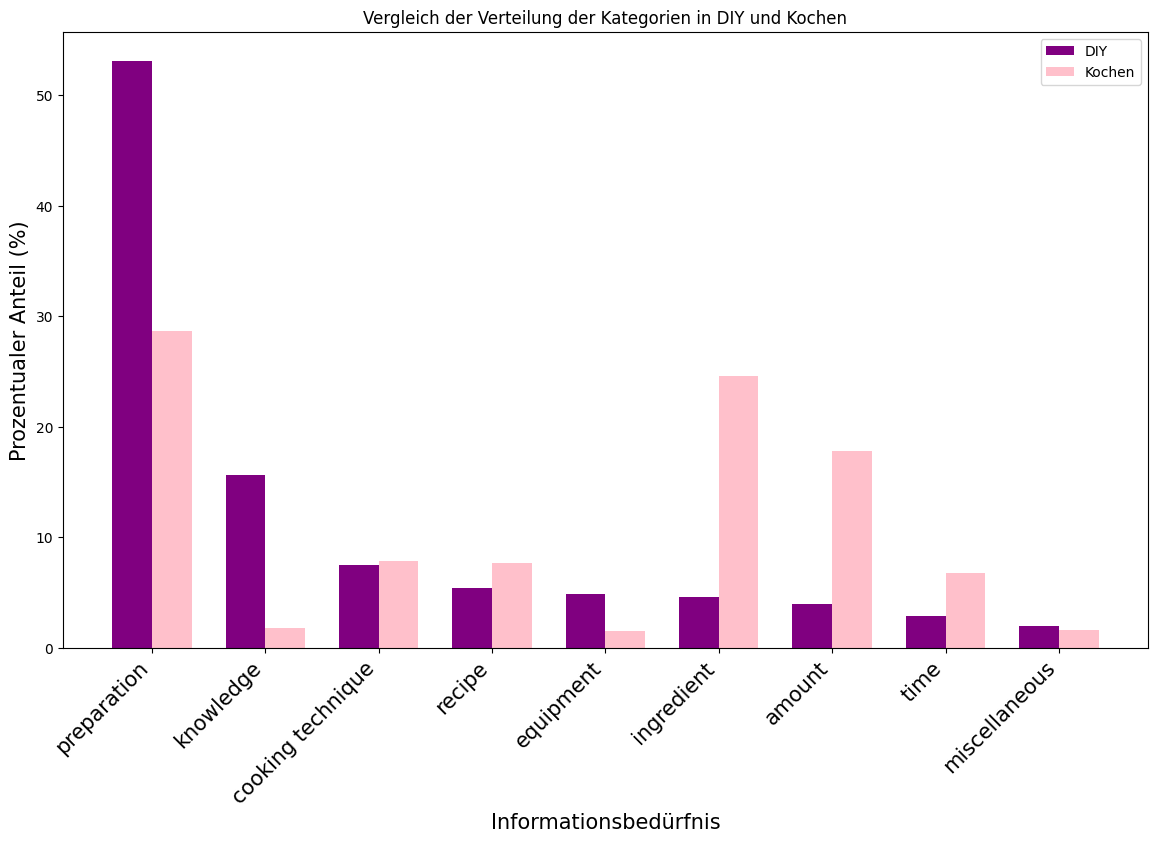

In [ ]:
# nur gleiche Label
common_index = diy_percentage.index.intersection(cook_percentage.index)
diy_percentage = diy_percentage[common_index]
cook_percentage = cook_percentage[common_index]

plt.figure(figsize=(14, 8))
bar_width = 0.35
x = np.arange(len(common_index))
# DIY
plt.bar(x - bar_width/2, diy_percentage, bar_width, label='DIY', color='purple')
# Kochen
plt.bar(x + bar_width/2, cook_percentage, bar_width, label='Kochen', color='pink')

plt.xlabel('Informationsbedürfnis', fontsize=15)
plt.xticks(x, common_index, rotation=45, ha='right', fontsize=15)
plt.ylabel('Prozentualer Anteil (%)', fontsize=15)
plt.title('Vergleich der Verteilung der Kategorien in DIY und Kochen')
plt.legend()
plt.show()

## Korrelation

In [178]:
correlation_df = pd.DataFrame({
    'DIY': diy_percentage,
    'Kochen': cook_percentage
})

correlation_matrix = correlation_df.corr()
print(correlation_matrix)

             DIY    Kochen
DIY     1.000000  0.578887
Kochen  0.578887  1.000000


## Inferentielle Stat.

In [179]:
df_inferent = pd.DataFrame({
    'DIY': counts_per_label_diy_mapped,
    'Kochen': counts_per_label_cook
})

print(df_inferent)

                      DIY  Kochen
amount              193.0     476
cooking technique   369.0     210
equipment           237.0      40
ingredient          224.0     658
knowledge           766.0      49
meal                  NaN      12
miscellaneous        99.0      44
preparation        2593.0     768
recipe              265.0     205
temperature           NaN      31
time                141.0     182


In [180]:
# Entfernen Kategorien meal und temperature
df_inferent = df_inferent.drop(['meal', 'temperature'])
print(df_inferent)

                      DIY  Kochen
amount              193.0     476
cooking technique   369.0     210
equipment           237.0      40
ingredient          224.0     658
knowledge           766.0      49
miscellaneous        99.0      44
preparation        2593.0     768
recipe              265.0     205
time                141.0     182


In [183]:
# Chi-Quadrat-Test
chi2, p, dof, expected = chi2_contingency(df_inferent)
# Nur die beiden Werte nötig
print(f"Chi-Quadrat-Wert: {chi2}")
print(f"p-Wert: {p}")

Chi-Quadrat-Wert: 1644.4179889933835
p-Wert: 0.0
